<a href="https://colab.research.google.com/github/jesusrincon1328/DataFrames/blob/main/Analisis_Aguas_Subterraneas_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

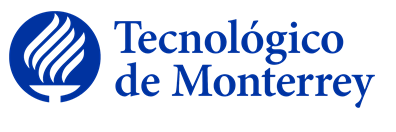

###Maestría en Inteligencia Artificial Aplicada
###**Curso: Ciencia y Analítica de Datos**

###Profesora: Dra. María de la Paz Rico Fernández
###**Reto parte 1: Limpieza, análisis, visualización y kmeans**

###Alumno: Francisco Javier Ramírez Arias
###Matrícula: A01316379

###Alumno: Jesús Angel Rincón Ruiz
###Matrícula: A01793960



###**Objetivo:**

###Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales. 

In [99]:
#Carga de Librerias
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib

from sklearn import metrics
from sklearn.metrics import r2_score

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
#Lectura de la Base de Datos de Aguas Subterraneas
df = pd.read_csv('/content/AguasSubterraneas_2020.csv',encoding='cp1252')
df.sample(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
333,DLHID1427,POZO EL MEXE,AGUAS DEL VALLE DE MEXICO,HIDALGO,FRANCISCO I. MADERO,ACTOPAN - SANTIAGO DE ANAYA,POZO,-99.08415,20.22377,2020,...,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI
638,OCBAL2875,POZO MARISCALA DE JUAREZ,BALSAS,OAXACA,MARISCALA DE JUAREZ,MARISCALA,POZO,-98.14664,17.85734,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
78,DLCHI296,VALLE DE JUAREZ 1,RIO BRAVO,CHIHUAHUA,JUAREZ,VALLE DE JUAREZ,POZO,-106.28142,31.54709,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
344,DLHID1486M1,POZO MICHIMALTONGO,AGUAS DEL VALLE DE MEXICO,HIDALGO,TULA DE ALLENDE,VALLE DEL MEZQUITAL,POZO,-99.38646,20.11190,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO
342,DLHID1475,MANANTIAL LOS CANGREJOS/VENTOQUIPA,GOLFO NORTE,HIDALGO,CUAUTEPEC DE HINOJOSA,VALLE DE TULANCINGO,POZO,-98.33827,20.03506,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
75,DLCAM5389,POZO DE A.P. JUSTO SIERRA,PENINSULA DE YUCATAN,CAMPECHE,CANDELARIA,PENINSULA DE YUCATAN,POZO,-90.73954,17.94648,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
663,OCCCN5244M1,POZO 5 RANCHO MI SUEÑO,CUENCAS CENTRALES DEL NORTE,DURANGO,LERDO,VILLA JUAREZ,POZO,-103.54249,25.51222,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
385,DLMIC1680,EJIDO BELLAS FUENTES,LERMA SANTIAGO PACIFICO,MICHOACAN DE OCAMPO,COENEO,ZACAPU,POZO,-101.68031,19.82134,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
314,DLGUA1188,SAN JOSE,LERMA SANTIAGO PACIFICO,GUANAJUATO,URIANGATO,CIENEGA PRIETA-MOROLEON,POZO,-101.17033,20.09883,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,NO,NO
226,DLDUR731,POZO 7 GABINO SANTILLAN,PACIFICO NORTE,DURANGO,DURANGO,VALLE DEL GUADIANA,POZO,-104.58664,23.98935,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [101]:
#¿Que tipo de dato son las valriables del conjunto de Datos?
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [102]:
#¿Cuantas variables de cada tipo de dato tenemos en nuestro Dataset?
df.dtypes.value_counts()

object     51
float64     5
int64       1
dtype: int64

In [103]:
#Revisemos cual es la dimención de nuetro Dataset.
df.shape

(1068, 57)

###Este archivo contiene la calidad del agua de **1,068 sitios subterráneos** en México; calificando su calidad con base en cada uno de los Indicadores y sus respectivas escalas.

###Se incluyen las coordenadas geográficas y datos generales de ubicación de cada sitio.

In [104]:
#Confirmemos si en nuestros Dataset tenemos valore nulos/faltantes
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [105]:
#Veamos cuantos valores nulos tenemos por variable
df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [132]:
#En total tendriamos 1532 datos nulos.
df.isnull().sum().sum()

1098

In [107]:
#Mostramos las columnas para posteriormente revisar los diferentes tipos de valores que se presentan en algunas de ellas.
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [108]:
df["PERIODO"].value_counts()

2020    1068
Name: PERIODO, dtype: int64

In [109]:
df["CONTAMINANTES"].value_counts()

FLUO,                                            78
DT,                                              65
FLUO,AS,                                         51
CF,                                              31
AS,                                              31
                                                 ..
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,               1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,     1
PB,MN,FE,                                         1
ALC,AS,FE,                                        1
ALC,DT,NO3,                                       1
Name: CONTAMINANTES, Length: 126, dtype: int64



###Observamos que nuestra variable **Valor de Alcalinidad Total en miligramos por litro(SDT_mg/L)** cuenta con **1068 valores nulos**, esto implica el 100% de las muestras por lo que se eliminara de nuestro Dataset.

###La variable **Contaminantes** cuenta con 434 valores nulos sin embargo esto es debido a que estas muestras(Sitios Subterranos) no presentan algun tipo de contaminación que se describa con esta variable, por lo que se mantiene en el Dataset.

###Las Variable **ALC_mg/L** presentan 4 Sitios Subterraneos sin valor, por consecuencía **CALIDAD_ALC** presenta los mismos datos nulos, la cantidad de datos nulos no es representativo para la muestra por lo que seran eliminados.

###Se presenta este mismo caso para las variables **CONDUCT_mS/cm**, **CALIDAD_CONDUC**, **CONDUCT_mS/cm**,**CALIDAD_CONDUC**,**SDT_M_mg/L** **CALIDAD_SDT_ra**,**CALIDAD_SDT_salin**, **DUR_mg/L**, **CALIDAD_DUR** que seran eliminadas sus muestras con valores nulos.

###La columna **"FECHA"** presenta el mismo valor para todas las muestras por lo que no sera relevante en nuestro analisis y sera eliminada.

In [110]:
#Agregaremos un valor a la Variable Contaminantes a aquellos valores nulos que indican que no hay presencia de contaminantes
#para posteriormente eliminar los valores nulos del resto del Dataset.

df["CONTAMINANTES"].fillna("OK", inplace= True)


In [111]:
#Observamos que los valores nulos de la Columna "CONTAMINANTES" fueron llenados con "OK" como indicación que no hay presencia de Contaminantes.
df["CONTAMINANTES"].value_counts()

OK                                               434
FLUO,                                             78
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
                                                ... 
ALC,FLUO,AS,FE,                                    1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 127, dtype: int64

In [133]:
#Eliminamos la columna "SDT_mg/L"
Clean_df= df.drop(["SDT_mg/L"],axis=1)

In [134]:
#Eliminamos las muestras con datos nulos.
Clean_df.dropna(inplace=True)


In [135]:
#Comprobamos que nuestro Dataset se encuentra libre de Datos nulos y Variables que al momento no se consideran de relevancia para el analisis.
Clean_df.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

In [161]:
Clean_df.shape

(1054, 56)

###Ya con nuestro Dataset limpio continuaremos explorando

In [136]:
#Visualisemos la distribución de los sitios subterraneos por su ubicación(Estado)
gb = df.groupby('ESTADO').apply(len)
gb

ESTADO
AGUASCALIENTES                      14
BAJA CALIFORNIA                     31
BAJA CALIFORNIA SUR                 49
CAMPECHE                            25
CHIAPAS                             21
CHIHUAHUA                           35
COAHUILA DE ZARAGOZA                59
COLIMA                              26
DISTRITO FEDERAL                     2
DURANGO                            121
GUANAJUATO                          41
GUERRERO                             5
HIDALGO                             37
JALISCO                             33
MEXICO                              24
MICHOACAN DE OCAMPO                 27
MORELOS                             11
NAYARIT                              8
NUEVO LEON                          15
OAXACA                              20
PUEBLA                              23
QUERETARO ARTEAGA                    6
QUINTANA ROO                        15
SAN LUIS POTOSI                     47
SINALOA                             32
SONORA            

In [137]:
#Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo 
geb = df.groupby('SUBTIPO').apply(len)
geb

SUBTIPO
BOMBEO CENOTE       1
CENOTE              7
DESCARGA            1
MANANTIAL          12
NORIA               3
POZO             1039
POZO NORIA          4
Pozo                1
dtype: int64

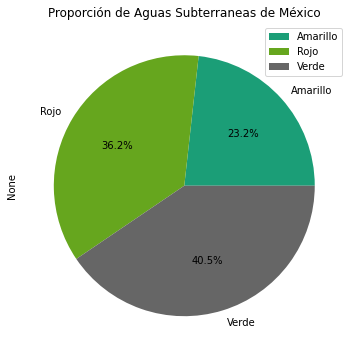

In [165]:
#Veamos la proporción de nuestra variable "SEMAFORO" la cual nos indica el nivel de contaminacion de acuerdo a los contaminantes presentes
gsb = Clean_df.groupby('SEMAFORO').apply(len)
gsb.plot(kind='pie', title = 'Proporción de Aguas Subterraneas de México', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=True);

In [139]:
#Describamos nuestros datos numericos.
Clean_df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471
std,6.697568,3.875005,0.0,111.147849,1248.990617
min,-116.664250,14.561150,2020.0,26.640000,110.000000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000


In [141]:
#Notamos que la función describe dejo fuera algunos otras variables numericas por incluir el simbolo de desigualdad "<" como 'SDT_M_mg/L','DUR_mg/L', etc.
#Cambiemos este tipo de valor a numerico.

Clean_df['SDT_M_mg/L'] = Clean_df['SDT_M_mg/L'].str.replace('<', '')
Clean_df['SDT_M_mg/L'] = pd.to_numeric(Clean_df['SDT_M_mg/L'])

Clean_df['FLUORUROS_mg/L'] = Clean_df['FLUORUROS_mg/L'].str.replace('<', '')
Clean_df['FLUORUROS_mg/L'] = pd.to_numeric(Clean_df['FLUORUROS_mg/L'])

Clean_df['DUR_mg/L'] = Clean_df['DUR_mg/L'].str.replace('<', '')
Clean_df['DUR_mg/L'] = pd.to_numeric(Clean_df['DUR_mg/L'])

Clean_df['COLI_FEC_NMP/100_mL'] = Clean_df['COLI_FEC_NMP/100_mL'].str.replace('<', '')
Clean_df['COLI_FEC_NMP/100_mL'] = pd.to_numeric(Clean_df['COLI_FEC_NMP/100_mL'])

Clean_df['N_NO3_mg/L'] = Clean_df['N_NO3_mg/L'].str.replace('<', '')
Clean_df['N_NO3_mg/L'] = pd.to_numeric(Clean_df['N_NO3_mg/L'])

Clean_df['AS_TOT_mg/L'] = Clean_df['AS_TOT_mg/L'].str.replace('<', '')
Clean_df['AS_TOT_mg/L'] = pd.to_numeric(Clean_df['AS_TOT_mg/L'])

Clean_df['CD_TOT_mg/L'] = Clean_df['CD_TOT_mg/L'].str.replace('<', '')
Clean_df['CD_TOT_mg/L'] = pd.to_numeric(Clean_df['CD_TOT_mg/L'])

Clean_df['CR_TOT_mg/L'] = Clean_df['CR_TOT_mg/L'].str.replace('<', '')
Clean_df['CR_TOT_mg/L'] = pd.to_numeric(Clean_df['CR_TOT_mg/L'])

Clean_df['HG_TOT_mg/L'] = Clean_df['HG_TOT_mg/L'].str.replace('<', '')
Clean_df['HG_TOT_mg/L'] = pd.to_numeric(Clean_df['HG_TOT_mg/L'])

Clean_df['PB_TOT_mg/L'] = Clean_df['PB_TOT_mg/L'].str.replace('<', '')
Clean_df['PB_TOT_mg/L'] = pd.to_numeric(Clean_df['PB_TOT_mg/L'])

Clean_df['MN_TOT_mg/L'] = Clean_df['MN_TOT_mg/L'].str.replace('<', '')
Clean_df['MN_TOT_mg/L'] = pd.to_numeric(Clean_df['MN_TOT_mg/L'])

Clean_df['FE_TOT_mg/L'] = Clean_df['FE_TOT_mg/L'].str.replace('<', '')
Clean_df['FE_TOT_mg/L'] = pd.to_numeric(Clean_df['FE_TOT_mg/L'])




In [148]:
#Describamos nuevamente nuestros datos numericos.
Clean_df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471,896.945797,1.078547,349.893584,359.734156,4.321651,0.019504,0.00303,0.013353,0.000557,0.005285,0.072960,0.412234
std,6.697568,3.875005,0.0,111.147849,1248.990617,2765.757924,1.931204,360.960153,2065.705773,8.378332,0.035051,0.00090,0.155412,0.000470,0.003276,0.378856,5.574307
min,-116.664250,14.561150,2020.0,26.640000,110.000000,101.200000,0.200000,20.000000,1.100000,0.020000,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000,338.050000,0.269475,121.512000,1.100000,0.651667,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000,551.400000,0.506950,245.994450,1.100000,2.082916,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.046900
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000,915.600000,1.142400,455.617200,10.750000,5.190385,0.010000,0.00300,0.005000,0.000500,0.005000,0.009830,0.172275
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.03211,5.003200,0.014150,0.080900,8.982000,178.615000


In [149]:
#Dejemos fuera las variables de "LONGITUD", "LATITUD" y "PERIODO" para seguir explorando nuestros datos
df_explore = Clean_df[["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L",
                 "PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]].copy()


In [150]:
#Media de nuestros datos númericos
df_explore.mean()

ALC_mg/L                234.695266
CONDUCT_mS/cm          1142.726471
SDT_M_mg/L              896.945797
FLUORUROS_mg/L            1.078547
DUR_mg/L                349.893584
COLI_FEC_NMP/100_mL     359.734156
N_NO3_mg/L                4.321651
AS_TOT_mg/L               0.019504
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013353
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005285
MN_TOT_mg/L               0.072960
FE_TOT_mg/L               0.412234
dtype: float64

In [151]:
#Valores maximos de nuestros datos númericos
df_explore.max()

ALC_mg/L                1650.000000
CONDUCT_mS/cm          18577.000000
SDT_M_mg/L             82170.000000
FLUORUROS_mg/L            34.803300
DUR_mg/L                3810.692200
COLI_FEC_NMP/100_mL    24196.000000
N_NO3_mg/L               121.007813
AS_TOT_mg/L                0.452200
CD_TOT_mg/L                0.032110
CR_TOT_mg/L                5.003200
HG_TOT_mg/L                0.014150
PB_TOT_mg/L                0.080900
MN_TOT_mg/L                8.982000
FE_TOT_mg/L              178.615000
dtype: float64

In [153]:
#Valores minimos de nuestros datos númericos
df_explore.min()

ALC_mg/L                26.6400
CONDUCT_mS/cm          110.0000
SDT_M_mg/L             101.2000
FLUORUROS_mg/L           0.2000
DUR_mg/L                20.0000
COLI_FEC_NMP/100_mL      1.1000
N_NO3_mg/L               0.0200
AS_TOT_mg/L              0.0100
CD_TOT_mg/L              0.0030
CR_TOT_mg/L              0.0050
HG_TOT_mg/L              0.0005
PB_TOT_mg/L              0.0050
MN_TOT_mg/L              0.0015
FE_TOT_mg/L              0.0250
dtype: float64

[]

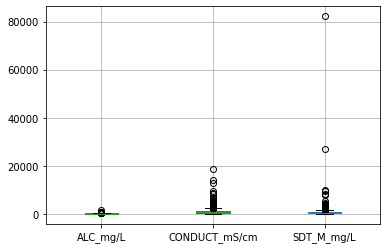

In [170]:
#Explemos nuestros datos a traves de Boxplot
b_plot = df_explore.boxplot(column = ["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L",]) 
b_plot.plot()
#plot.show()

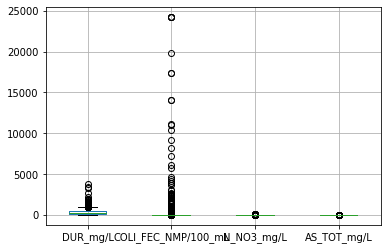

In [171]:
boxplot = df_explore.boxplot(column=["DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L"])  

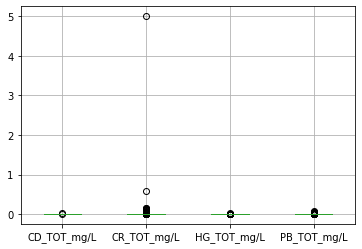

In [172]:
boxplot = df_explore.boxplot(column=["CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L"])  

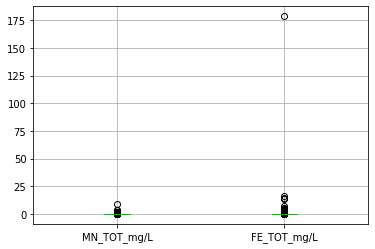

In [174]:
boxplot = df_explore.boxplot(column=["MN_TOT_mg/L","FE_TOT_mg/L"])

AxesSubplot(0.125,0.125;0.775x0.755)


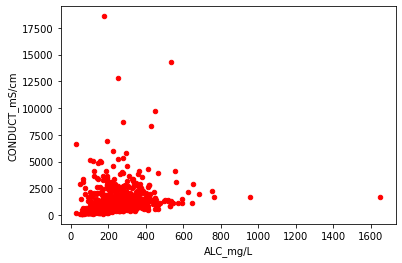

In [176]:
ax1 = df_explore.plot(kind='scatter', x='ALC_mg/L', y='CONDUCT_mS/cm', color='r')    
#ax2 = df_explore.plot(kind='scatter', x='SDT_M_mg/L', y='FLUORUROS_mg/L', color='g', ax=ax1)    
#ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)

print(ax1)  # True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1410cda450>,
      dtype=object)

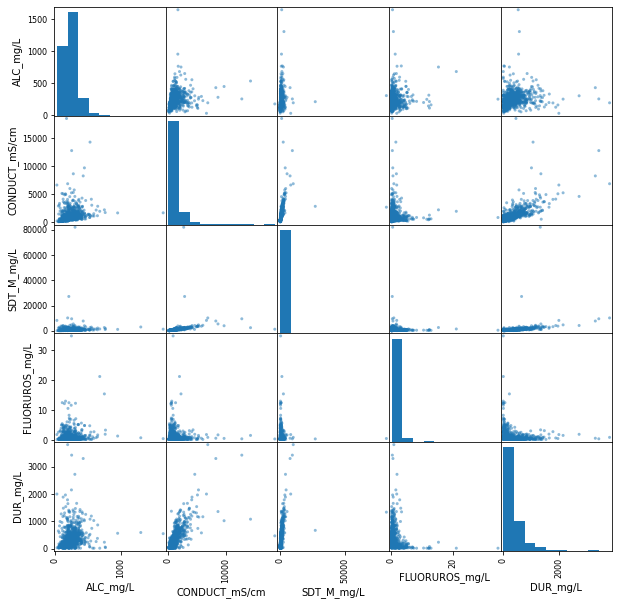

In [42]:
pd.plotting.scatter_matrix(df_explore.iloc[:, 0:5],figsize = (10,10))

In [43]:
sns.pairplot(df_explore)

Error in callback <function flush_figures at 0x7f142c577050> (for post_execute):


KeyboardInterrupt: ignored

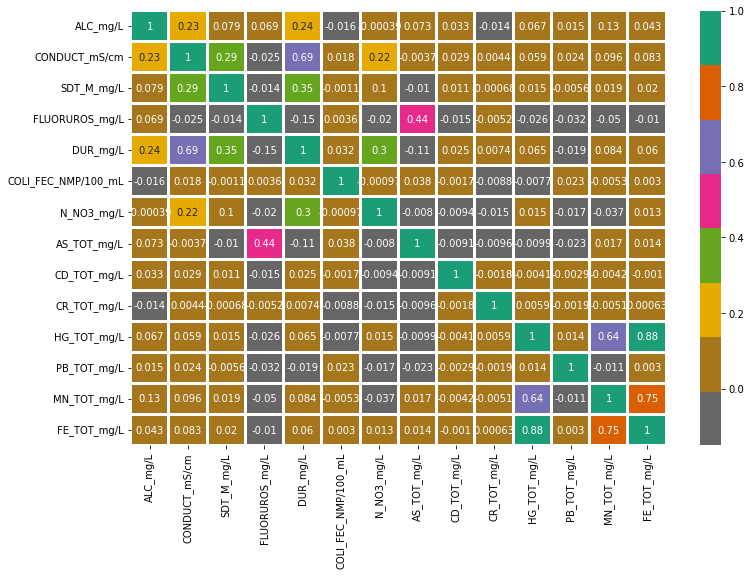

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df_explore.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [47]:
new_df = df[["ESTADO","LONGITUD","LATITUD","SEMAFORO"]].copy()
new_df

,ESTADO,LONGITUD,LATITUD,SEMAFORO
0,AGUASCALIENTES,-102.02210,22.20887,Verde
1,AGUASCALIENTES,-102.20075,21.99958,Verde
2,AGUASCALIENTES,-102.28801,22.36685,Rojo
3,AGUASCALIENTES,-102.29449,22.18435,Verde
4,BAJA CALIFORNIA SUR,-110.24480,23.45138,Rojo
...,...,...,...,...
1063,NUEVO LEON,-99.54191,24.76036,Rojo
1064,NUEVO LEON,-99.70099,24.78280,Rojo
1065,NUEVO LEON,-99.82249,25.55197,Rojo
1066,NUEVO LEON,-100.32683,24.80118,Verde


In [48]:
new_df.isna().values.any()

False

In [49]:
df.isna().any()


CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG              False
PB_TOT_mg/L             False
CALIDAD_PB

In [50]:
import geopandas
from geopy.geocoders import Nominatim

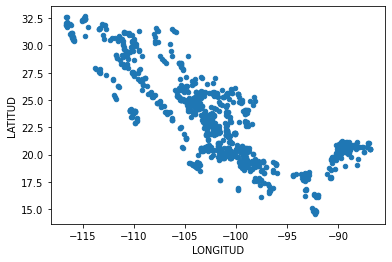

In [51]:
latlong=df[["LATITUD","LONGITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [52]:
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [53]:
latlong["Coordinates"] = list(zip(latlong.LONGITUD, latlong.LATITUD))
latlong["Coordinates"] = latlong["Coordinates"].apply(Point)
latlong.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.2448 23.45138)


In [54]:
gdf = gpd.GeoDataFrame(latlong, geometry="Coordinates")
gdf.head()


,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [55]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()


,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [56]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

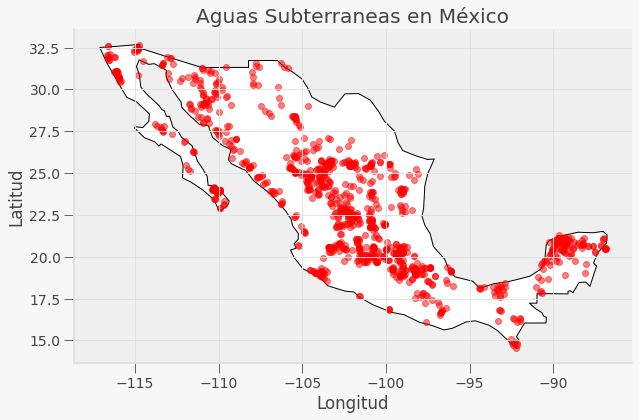

In [57]:
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax,
edgecolor='black',color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Aguas Subterraneas en México')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

#*Realizar un análisis para encontrar si existe una relación entre la calidad de agua y su ubicación geográfica a través de K-means.





In [58]:
! pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
#Librerias para el análisis de K-MEANS
import scipy.spatial
from haversine import haversine
from sklearn.cluster import KMeans


In [76]:
#Revisión de los datos de latitud y longitud
latlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LATITUD      1068 non-null   float64 
 1   LONGITUD     1068 non-null   float64 
 2   Coordinates  1068 non-null   geometry
 3   Semaforo     1068 non-null   object  
dtypes: float64(2), geometry(1), object(1)
memory usage: 33.5+ KB


In [77]:
#Ajuste del modelo
kmeans = KMeans(n_clusters=3)
kmeans.fit(latlong)

TypeError: ignored

In [78]:
centers = kmeans.cluster_centers_
print("'kmeans' model intances is trained and the cluster centroids are stored in 'centers'")
centers

AttributeError: ignored

In [79]:
sum_square = {}
for k in range(1, 10):
 kmeans = KMeans(n_clusters=k).fit(latlong)
 sum_square[k] = kmeans.inertia_

fig,ax = plt.subplots(figsize=(18,5))
ax.plot(list(sum_square.keys()),
list(sum_square.values()),ls='-',marker='H', color='DarkBlue', lw=2, markersize=12,markerfacecolor = 'DarkGreen')
ax.set_xlabel("Value of k")
ax.set_ylabel("Kmeans.inertia_")

TypeError: ignored

In [ ]:
clustering = KMeans(n_clusters = 3, max_iter= 10000)
clustering.fit(latlong)

Optimal_centers =  pd.DataFrame(clustering.cluster_centers_)

print("Los centroides se encuentran en las siguientes coordenadas:\n", clustering.cluster_centers_)

latlong["Cluster"] = clustering.labels_

latlong

In [ ]:
latlong["Semaforo"] = df['SEMAFORO']
#latlong.drop(['colormap'],axis=1, inplace=True)
latlong


In [ ]:
geb_count = latlong.groupby('Semaforo').apply(len)
geb_count

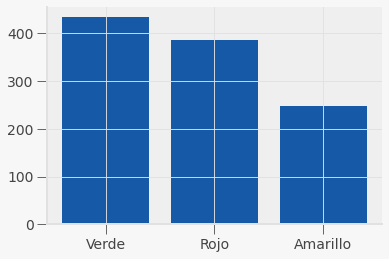

[434, 387, 247]

In [80]:
x_values = latlong['Semaforo'].unique()
y_values = latlong['Semaforo'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

In [81]:
rslt_df_clt_0 = latlong[latlong['Cluster'] == 0]
rslt_df_clt_1 = latlong[latlong['Cluster'] == 1]
rslt_df_clt_2 = latlong[latlong['Cluster'] == 2]


KeyError: ignored

In [82]:
x_values = rslt_df_clt_0['Semaforo'].unique()
y_values = rslt_df_clt_0['Semaforo'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

NameError: ignored

In [83]:
x_values = rslt_df_clt_1['Semaforo'].unique()
y_values = rslt_df_clt_1['Semaforo'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

NameError: ignored

In [84]:
x_values = rslt_df_clt_2['Semaforo'].unique()
y_values = rslt_df_clt_2['Semaforo'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

NameError: ignored

In [85]:
latlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   LATITUD      1068 non-null   float64 
 1   LONGITUD     1068 non-null   float64 
 2   Coordinates  1068 non-null   geometry
 3   Semaforo     1068 non-null   object  
dtypes: float64(2), geometry(1), object(1)
memory usage: 33.5+ KB


In [86]:
colors = ["#DF2020", "#81DF20", "#2095DF"]
latlong["colormap"] = latlong.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Lat = pd.DataFrame(latlong["LATITUD"])
Long = pd.DataFrame(latlong["LONGITUD"])
Clus = pd.DataFrame(latlong["colormap"])

plt.scatter(latlong.LONGITUD, latlong.LATITUD, c=latlong.colormap)
plt.scatter(Optimal_centers[1], Optimal_centers[0], marker = "d", s=150, color= "#0A0A0A")
plt.gcf().set_size_inches((7.5,5))

plt.xlabel("longitude")
plt.ylabel("longitude")
plt.show()

AttributeError: ignored

In [87]:
latlong.

SyntaxError: ignored

In [ ]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

#kmeans = KMeans(n_clusters=3)
#kmeans.fit(latlong)
#centers 
#kmeans.labels_
#y_kmeans = kmeans.predict(latlong)
#y_kmeans

In [ ]:
#y_kmeans = kmeans.predict(latlong)
#plt.scatter(latlong[:, 0], latlong[:, 1], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [88]:
new_latlong = pd.DataFrame(centers, columns =['Latitude','Longitude'])
new_latlong

NameError: ignored

In [89]:
new_latlong.plot.scatter( "Longitude","Latitude")


NameError: ignored

In [90]:
new_latlong["Coordinates"] = list(zip(new_latlong.Longitude,
new_latlong.Latitude))
new_latlong["Coordinates"] = new_latlong["Coordinates"].apply(Point)
new_latlong.head()


NameError: ignored

In [91]:
gddf = gpd.GeoDataFrame(new_latlong, geometry="Coordinates")
gddf.head()


NameError: ignored

In [92]:
gddf.plot(ax=gax, color='blue', alpha = 0.8)

fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'Mexico'").plot(ax = gax,
edgecolor='black', color='white')

gddf.plot(ax=gax, color='blue', alpha = 0.8)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()


NameError: ignored

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")
location_1 = geolocator.reverse(" 22.25423, -101.72213")
print(location_1)
location_2 = geolocator.reverse(" 19.47336, -90.72847")
print(location_2)
location_3 = geolocator.reverse("28.43820, -110.79449")
print(location_3)
